In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# 图像加法运算

In [3]:
fig = cv2.imread('images/highway.jpg', 1)

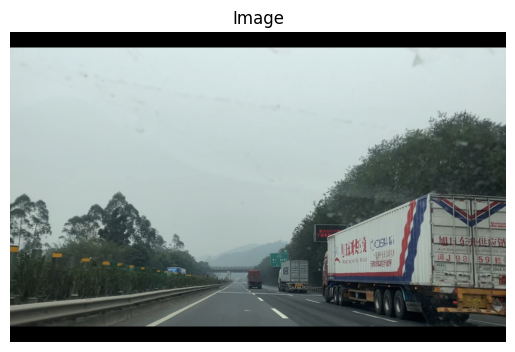

In [4]:
show(fig)

## 加号运算符

超出范围取mod

使用加号运算符计算图像像素值的和时，将和大于255的值进行了取模处理，取模后大于255的这部分值变得更小了，导致本来应该更亮的像素点变得更暗了，相加所得的图像看起来并不自然。


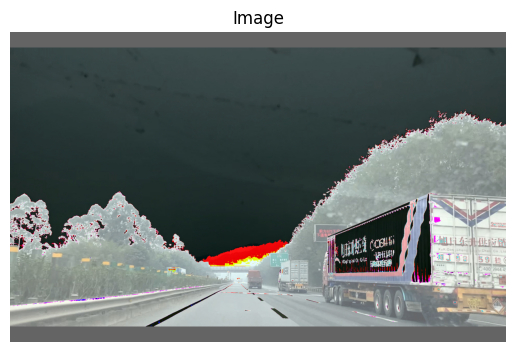

In [5]:
show(fig + 100)

## cv2.add() 函数

超过255取上限255

使用函数cv2.add()计算图像像素值的和时，将和大于255的值处理为饱和值255。图像像素值相加后让图像的像素值增大了，图像整体变亮。

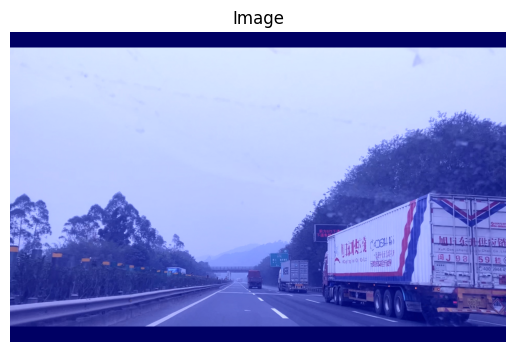

In [6]:
show(cv2.add(fig, 100))

# 图像加权和

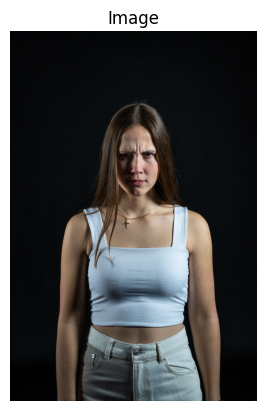

In [8]:
sumlia = cv2.imread('images/sumila.jpg', 1)
show(sumlia)

In [9]:
fig.shape

(1800, 2880, 3)

In [10]:
sumlia.shape

(4812, 3208, 3)

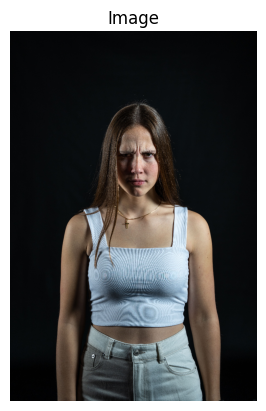

In [11]:
new_sumlia = sumlia[::4, ::4, :]
show(new_sumlia)

In [12]:
new_sumlia.shape

(1203, 802, 3)

In [19]:
new_car_fig = fig[:new_sumlia.shape[0], :new_sumlia.shape[1], :new_sumlia.shape[2]]
new_car_fig.shape

(1203, 802, 3)

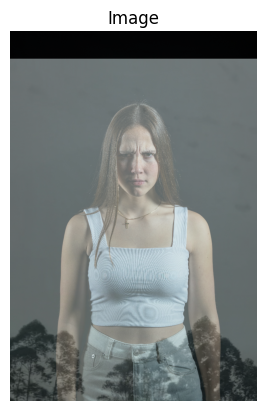

In [21]:
res = cv2.addWeighted(new_car_fig, 0.5, new_sumlia, 0.5, 0)
show(res)

# 按位逻辑运算

* cv2.bitwise_and()
* cv2.bitwise_or()
* cv2.bitwise_xor()
* cv2.bitwise_not()

In [22]:
a=np.random.randint(0,255, (5,5), dtype=np.uint8)
b=np.zeros((5,5), dtype=np.uint8)
b[0:3,0:3]=255
b[4,4]=255
c=cv2.bitwise_and(a, b)
print("a=\n", a)
print("b=\n", b)
print("c=\n", c)

a=
 [[ 49  21 139 149 216]
 [ 38 250  61  83  59]
 [ 49 118  37   6 116]
 [142 177 179   5 234]
 [ 50 227 158  60 169]]
b=
 [[255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 255]]
c=
 [[ 49  21 139   0   0]
 [ 38 250  61   0   0]
 [ 49 118  37   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 169]]


# 掩模

当使用掩模参数时，操作只会在掩模值为非空的像素点上执行，并将其他像素点的值置为0。

彩色图像的掩模也可以是单通道的。

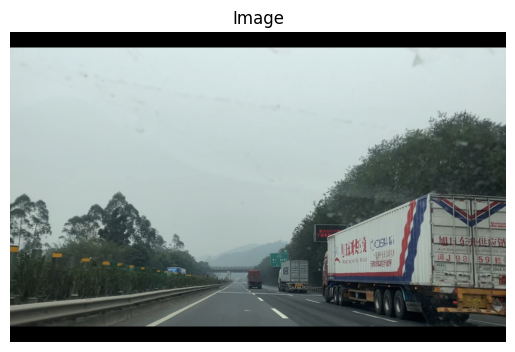

In [23]:
show(fig)

In [66]:
mask = np.zeros(fig.shape[:2], np.uint8)

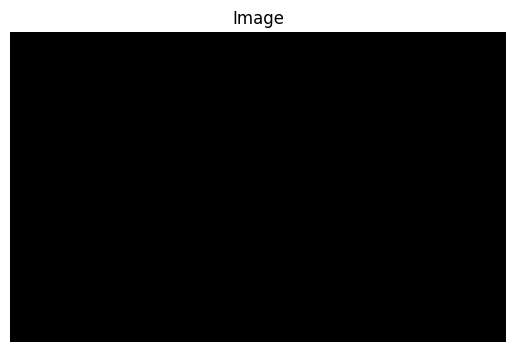

In [67]:
show(mask)

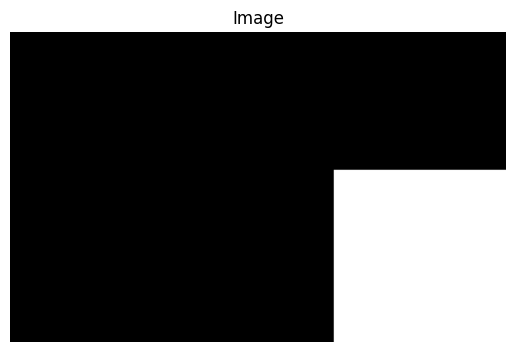

In [68]:
mask[-1000:,-1000:] = 255
show(mask)

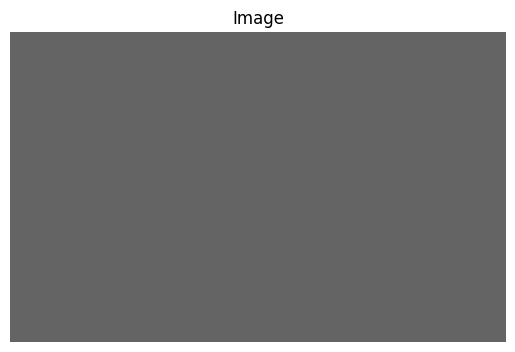

In [69]:
img2 = np.ones(fig.shape, np.uint8) * 100
show(img2)

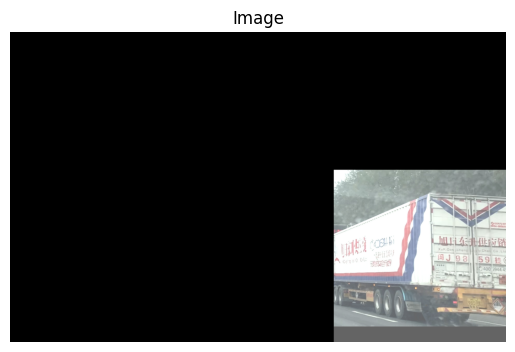

In [70]:
img3 = cv2.add(fig, img2, mask = mask)
show(img3)

# 位平面分解

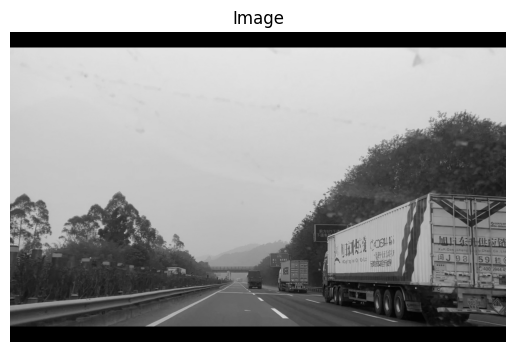

In [72]:
img = cv2.imread('images/highway.jpg', cv2.IMREAD_GRAYSCALE)
# equals to img = cv2.imread('images/highway.jpg', 0)
show(img)

In [73]:
r, c = img.shape
x = np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    x[:,:,i] = 2**i

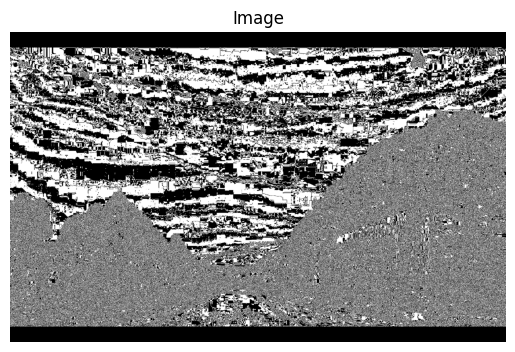

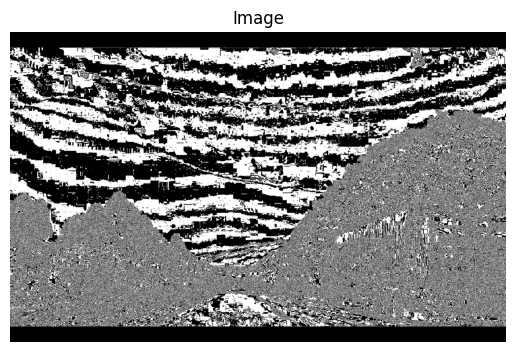

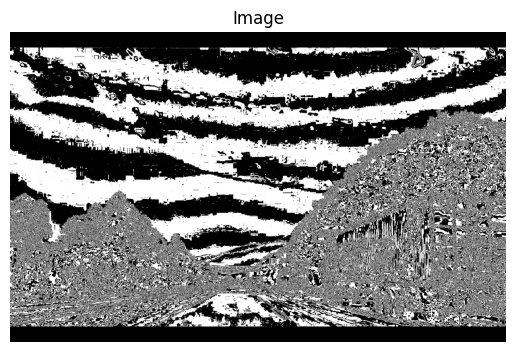

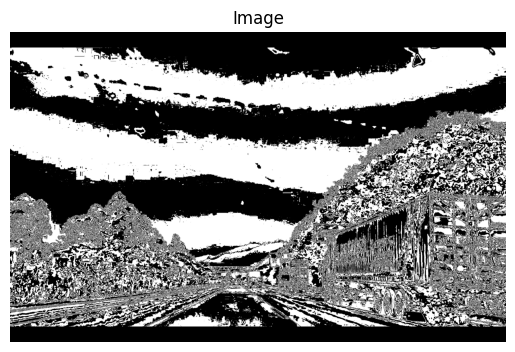

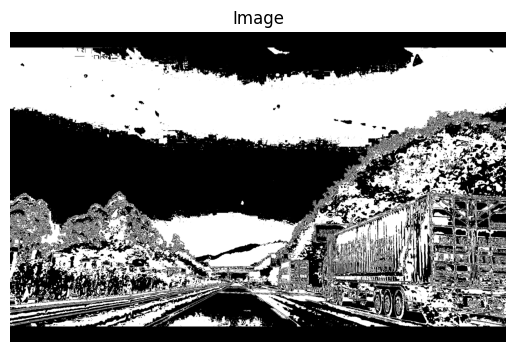

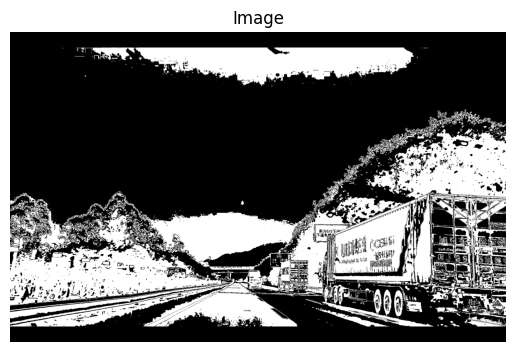

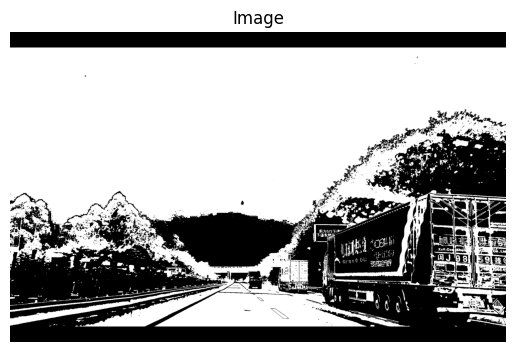

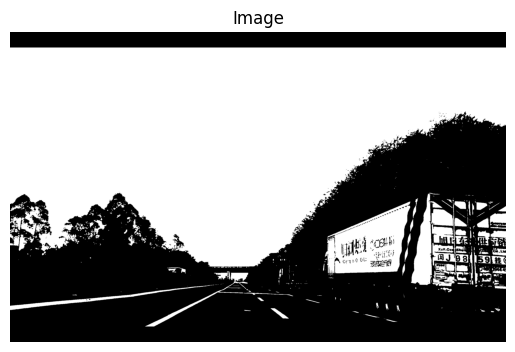

In [74]:
res = np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    res[:,:,i] = cv2.bitwise_and(img, x[:,:,i])
    mask = res[:,:,i] > 0
    res[mask] = 255
    show(res[:,:,i])

# 图像加密

基于上一课的位平面分解。

## 加密过程

In [81]:
img = cv2.imread('images/highway.jpg', 1)

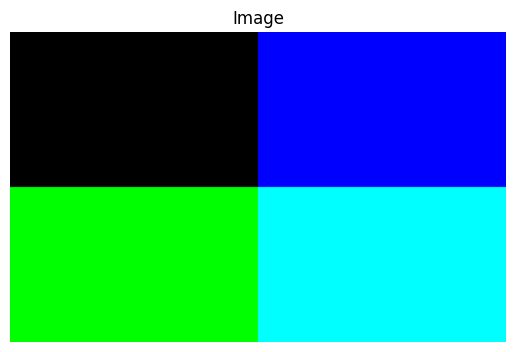

In [86]:
# watermark = np.random.randint(0,2, img.shape, dtype=np.uint8)
# watermark[watermark > 0] = 255
watermark = np.zeros(img.shape, dtype=np.uint8)
watermark[:, int(img.shape[1]/2):, 0] = 255
watermark[int(img.shape[0]/2):, :, 1] = 255
show(watermark)

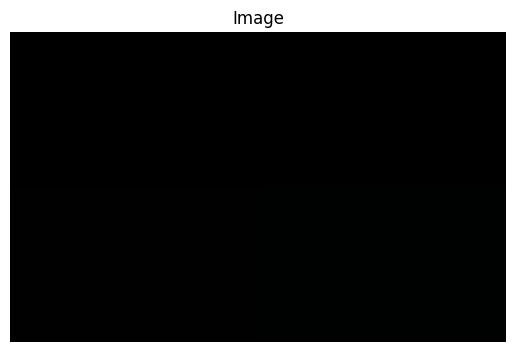

In [87]:
watermark[watermark > 0] = 1
show(watermark)

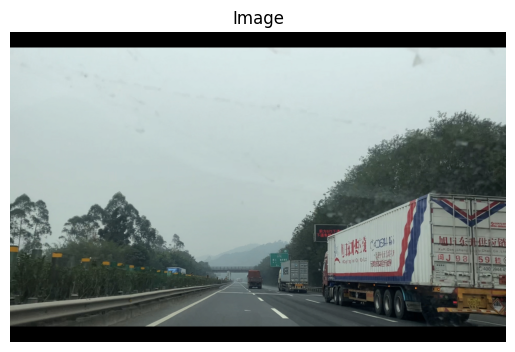

In [88]:
# core
t254 = np.ones(img.shape, dtype=np.uint8) * 254
img = cv2.bitwise_and(img, t254)
show(img)

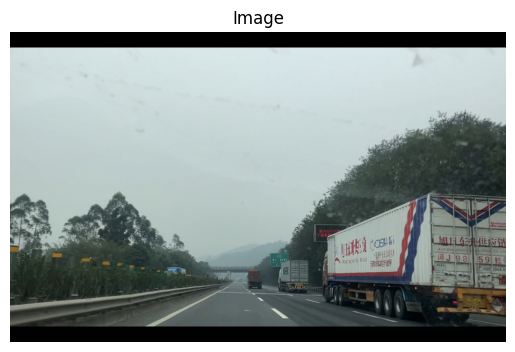

In [89]:
watered = cv2.bitwise_or(img, watermark)
show(watered)

## 解密过程

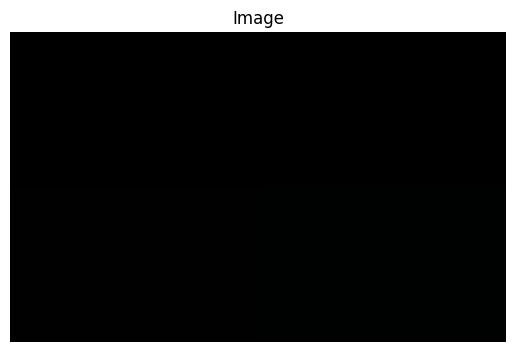

In [90]:
t1 = np.ones(img.shape, dtype=np.uint8)
watermark = cv2.bitwise_and(watermark, t1)
show(watermark)

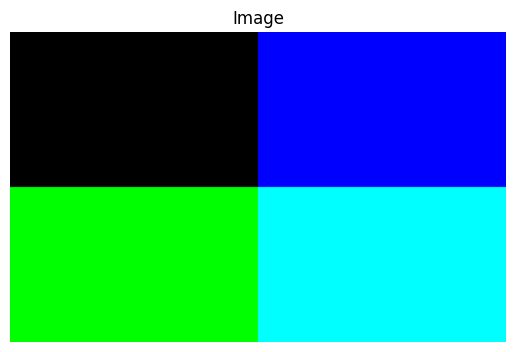

In [91]:
watermark[watermark > 0] = 255
show(watermark)